In [11]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the iris dataset
iris_df = sns.load_dataset('iris')

In [12]:
# Identify and exclude non-numeric columns
numeric_columns = iris_df.select_dtypes(include=['float64', 'int64']).columns

# Calculate statistics for numeric columns
count = iris_df[numeric_columns].count()
mean = iris_df[numeric_columns].mean()
std = iris_df[numeric_columns].std()
min_value = iris_df[numeric_columns].min()
Q1 = iris_df[numeric_columns].quantile(0.25)
median = iris_df[numeric_columns].median()
Q3 = iris_df[numeric_columns].quantile(0.75)
max_value = iris_df[numeric_columns].max()
range_values = max_value - min_value
IQR = Q3 - Q1


In [13]:
# Combine the statistics into one dataframe
summary_df = pd.concat([count, mean, std, min_value, Q1, median, Q3, max_value, range_values, IQR], axis=1)
summary_df.columns = ['Count', 'Mean', 'Std', 'Min', '25%', 'Median', '75%', 'Max', 'Range', 'IQR']
print("Summary Statistics along with Range and IQR:\n", summary_df)

Summary Statistics along with Range and IQR:
               Count      Mean       Std  Min  25%  Median  75%  Max  Range  \
sepal_length    150  5.843333  0.828066  4.3  5.1    5.80  6.4  7.9    3.6   
sepal_width     150  3.057333  0.435866  2.0  2.8    3.00  3.3  4.4    2.4   
petal_length    150  3.758000  1.765298  1.0  1.6    4.35  5.1  6.9    5.9   
petal_width     150  1.199333  0.762238  0.1  0.3    1.30  1.8  2.5    2.4   

              IQR  
sepal_length  1.3  
sepal_width   0.5  
petal_length  3.5  
petal_width   1.5  


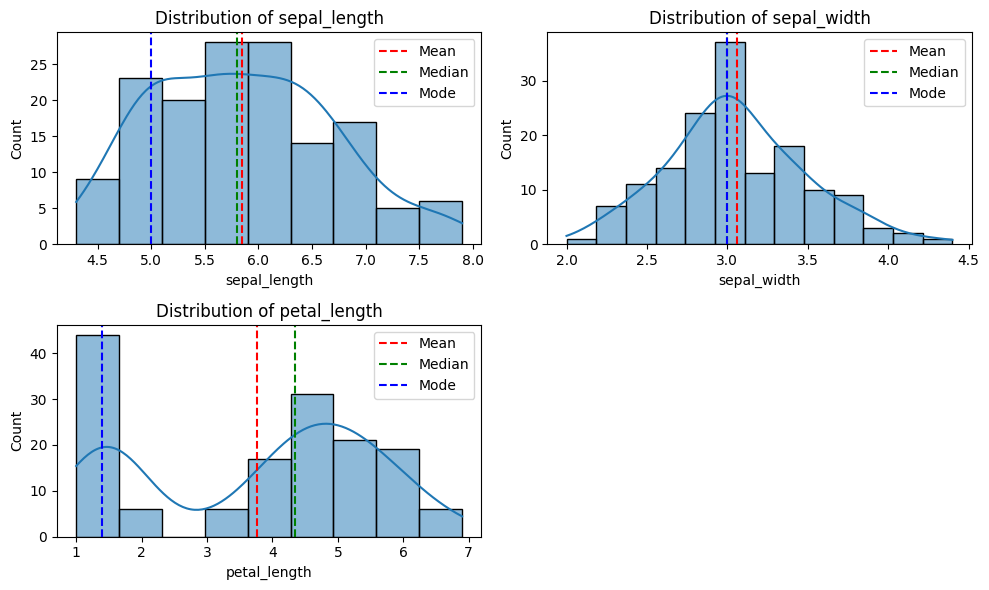

In [14]:
# plot mean, median, and mode for numeric columns
plt.figure(figsize=(10, 6))

# Plotting histograms for each numerical column
for i, column in enumerate(numeric_columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.histplot(iris_df[column], kde=True)
    plt.title(f'Distribution of {column}')

    # Plotting mean, median, and mode for each numerical column
    mean_value = iris_df[column].mean()
    median_value = iris_df[column].median()
    mode_value = stats.mode(iris_df[column])[0]
    plt.axvline(x=mean_value, color='r', linestyle='--', label='Mean')
    plt.axvline(x=median_value, color='g', linestyle='--', label='Median')
    plt.axvline(x=mode_value, color='b', linestyle='--', label='Mode')
    plt.legend()

plt.tight_layout()
plt.show()
